# Actividad 1
Octavio Fenollosa, Ana Sofia Rojas, Do Hyun Nam
## Primera Parte

In [64]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import latex
sns.set()

### 1. Carga los datos usando tu lector de csv o con pandas. Es recomendable hacerlo con pandas.


In [65]:
df = pd.read_csv("datos/nutrition.csv", index_col=1).dropna()
df.head()

,Unnamed: 0,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,
"Nuts, pecans",1,100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
"Teff, uncooked",3,100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
"Sherbet, orange",4,100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
"Cauliflower, raw",5,100 g,25,0.3g,0.1g,0,30.00 mg,44.3 mg,57.00 mcg,0.00 mcg,...,0.28 g,0.130 g,0.034 g,0.031 g,0.00 mg,0.0 g,0.76 g,0.00 mg,0.00 mg,92.07 g
"Taro leaves, raw",6,100 g,42,0.7g,0.2g,0,3.00 mg,12.8 mg,126.00 mcg,0.00 mcg,...,0.74 g,0.151 g,0.060 g,0.307 g,0.00 mg,0.0 g,1.92 g,0.00 mg,0.00 mg,85.66 g


2. Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7199 entries, Nuts, pecans to Beef, raw, all grades, trimmed to 0" fat, separable lean only, boneless, eye of round steak, round
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   7199 non-null   int64 
 1   serving_size                 7199 non-null   object
 2   calories                     7199 non-null   int64 
 3   total_fat                    7199 non-null   object
 4   saturated_fat                7199 non-null   object
 5   cholesterol                  7199 non-null   object
 6   sodium                       7199 non-null   object
 7   choline                      7199 non-null   object
 8   folate                       7199 non-null   object
 9   folic_acid                   7199 non-null   object
 10  niacin                       7199 non-null   object
 11  pantothenic_acid             7199 non-null   ob

3. Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.


In [67]:
# Reducir a los datos que queremos 
df_nutri = df[['calories','total_fat','carbohydrate','sodium','protein']]

# Convertir strings a numerics
df_nutri['sodium'] = df_nutri['sodium'].str.rstrip('mg').astype('float')
df_nutri['total_fat'] = df_nutri['total_fat'].str.rstrip('g').astype('float')
df_nutri['carbohydrate'] = df_nutri['carbohydrate'].str.rstrip('g').astype('float')
df_nutri['protein'] = df_nutri['protein'].str.rstrip('g').astype('float')



<ipython-input-67-e625ec3adffc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nutri['sodium'] = df_nutri['sodium'].str.rstrip('mg').astype('float')
<ipython-input-67-e625ec3adffc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nutri['total_fat'] = df_nutri['total_fat'].str.rstrip('g').astype('float')
<ipython-input-67-e625ec3adffc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

In [68]:
df_nutri.describe()


,calories,total_fat,carbohydrate,sodium,protein
count,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000
mean,255.973330,12.625281,23.156054,323.619669,13.243876
std,166.281991,16.511061,28.128419,743.063434,10.259300
min,4.000000,0.100000,0.000000,0.000000,0.000000
25%,130.000000,2.800000,0.000000,55.000000,4.370000
50%,221.000000,7.400000,8.840000,115.000000,10.840000
75%,361.000000,16.000000,44.800000,450.000000,21.390000
max,902.000000,100.000000,98.550000,26000.000000,88.320000


4. Basándose en la media, mediana y desviación estándar de cada variable, que conclusiones puedes entregar de los datos.


Primero que nada podemos observar que el rango de valores es muy amplio para la mayoría de los datos que se contienen dentro de la base de datos. Asímismo, observamos que la desviación estándar es mayor a la media, por lo que puede inferir que los datos son muy dispersos y que las medidas de tendencia central no tienen una validéz considerable dentro del análisis. Esto más que nada se debe a la cantidad de datos que se tienen y la variedad de alimentos que hay dentro del conjunto de datos, es imposible derivar conclusiones de una base de datos con 7199 datos en donde sus categorías van desde alimentos saludables hasta lo denominado comida chatarra. 

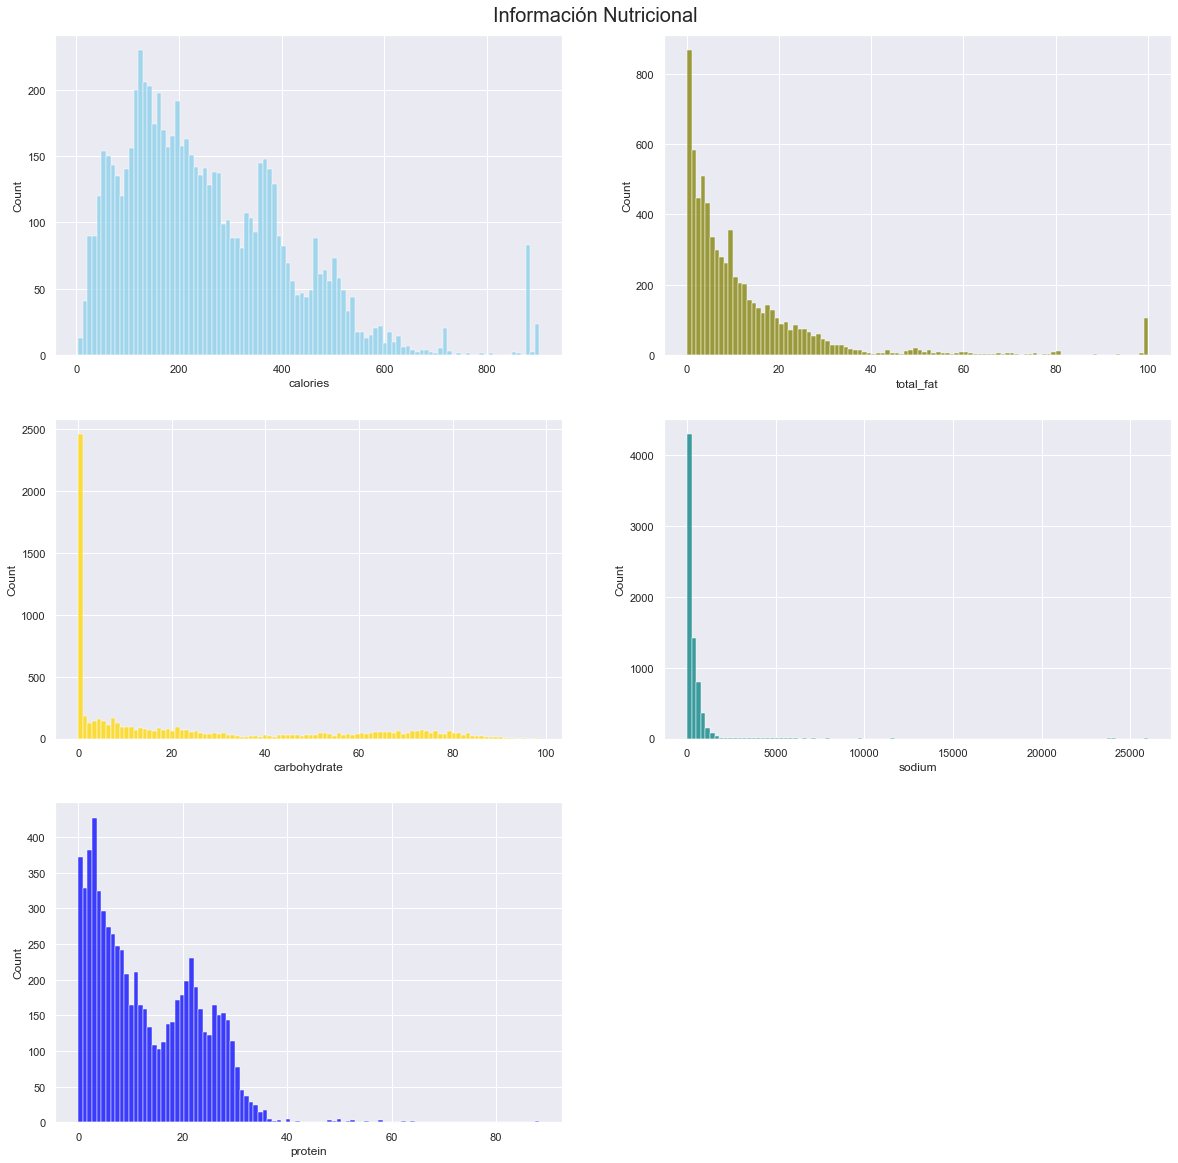

In [69]:
# Histogramas por cada info nutricional
fig, axes = plt.subplots(3, 2, figsize=(20, 20), sharex=False)

fig.suptitle('Información Nutricional', y=0.9, fontsize=20)
sns.histplot(df_nutri["calories"], color="skyblue", stat='count', bins=100, ax=axes[0, 0])
sns.histplot(df_nutri["total_fat"], color="olive", stat='count', bins=100, ax=axes[0, 1])
sns.histplot(df_nutri["carbohydrate"], color="gold", stat='count', bins=100, ax=axes[1, 0])
sns.histplot(df_nutri["sodium"], color="teal", stat='count', bins=100,ax=axes[1, 1])
sns.histplot(df_nutri["protein"], color="blue", stat='count', bins=100,ax=axes[2, 0])
fig.delaxes(axes[2,1])

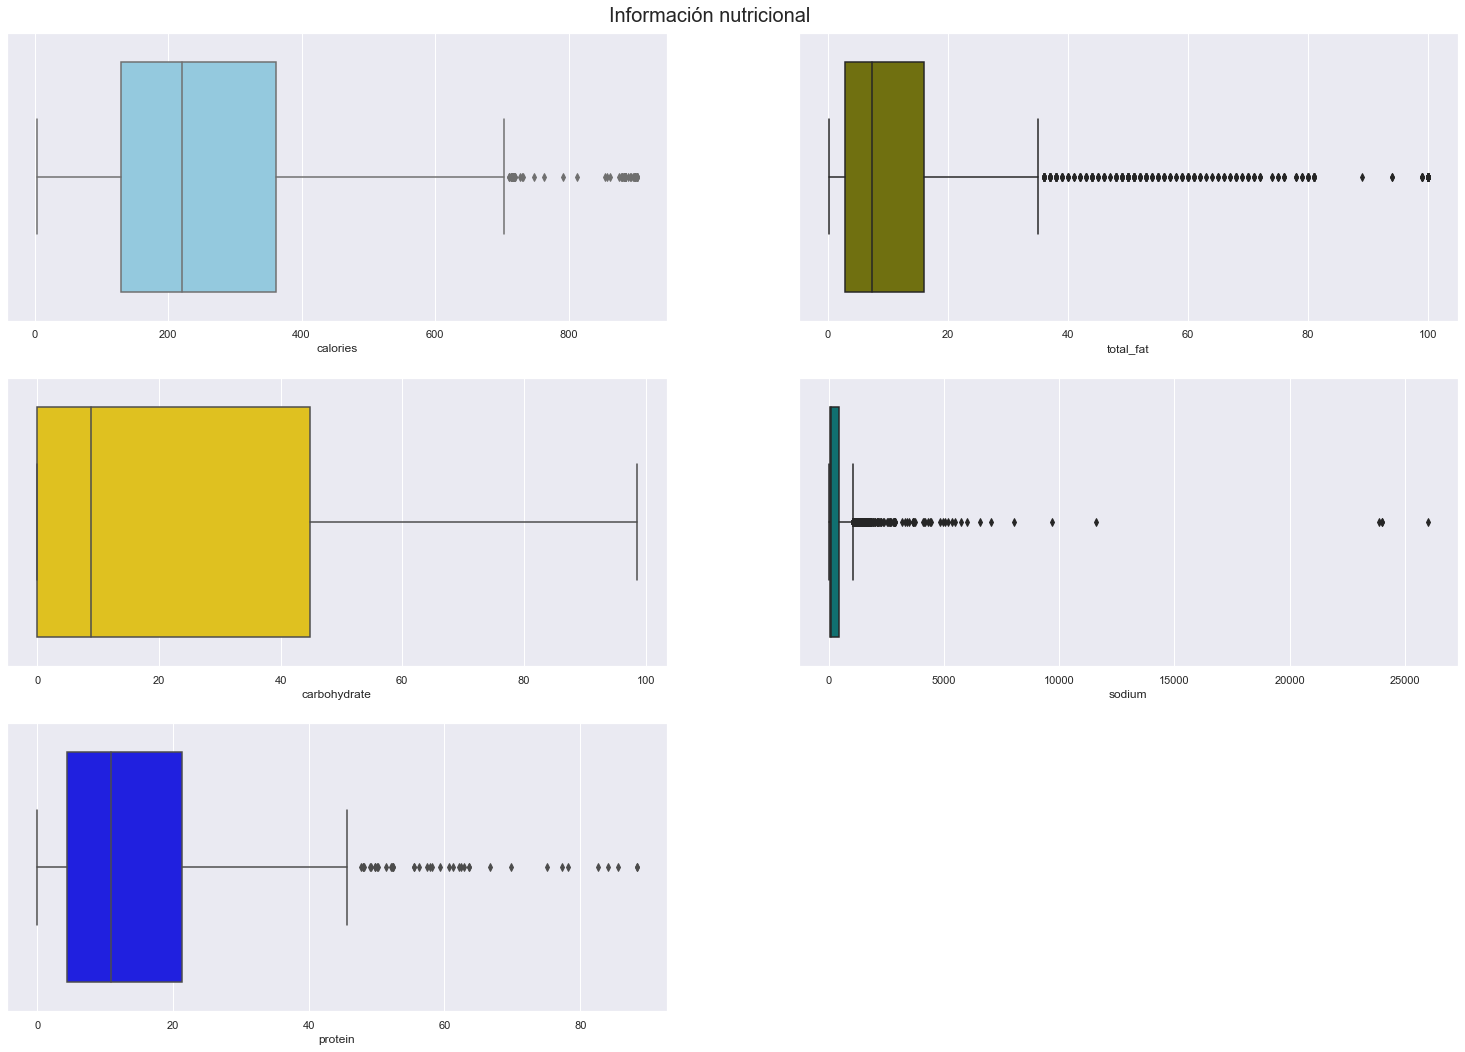

In [70]:
# Caja y bigote de la cantidad nutricional
f, axes = plt.subplots(nrows=3, ncols=2, figsize=(26,18))

f.suptitle('Información nutricional', y=0.9, fontsize=20)
sns.boxplot(x=df_nutri['calories'], color="skyblue", ax=axes[0, 0])
sns.boxplot(x=df_nutri['total_fat'], color="olive", ax=axes[0, 1])
sns.boxplot(x=df_nutri['carbohydrate'], color="gold", ax=axes[1, 0])
sns.boxplot(x=df_nutri['sodium'], color="teal", ax=axes[1, 1])
sns.boxplot(x=df_nutri['protein'], color="blue", ax=axes[2, 0])

f.delaxes(axes[2,1])

In [71]:
# Heatmap de contenido mineral de 10 alimentos al azar
df_min = df[["copper", "irom", "magnesium", "manganese", "phosphorous", "potassium"]]

df_min['copper'] = df_min['copper'].str.rstrip('mg').astype('float')
df_min['irom'] = df_min['irom'].str.rstrip('mg').astype('float')
df_min['magnesium'] = df_min['magnesium'].str.rstrip('mg').astype('float')
df_min['manganese'] = df_min['manganese'].str.rstrip('mg').astype('float')
df_min['phosphorous'] = df_min['phosphorous'].str.rstrip('mg').astype('float')
df_min['potassium'] = df_min['potassium'].str.rstrip('mg').astype('float')

<ipython-input-71-e31f5bbd2603>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min['copper'] = df_min['copper'].str.rstrip('mg').astype('float')
<ipython-input-71-e31f5bbd2603>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_min['irom'] = df_min['irom'].str.rstrip('mg').astype('float')
<ipython-input-71-e31f5bbd2603>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

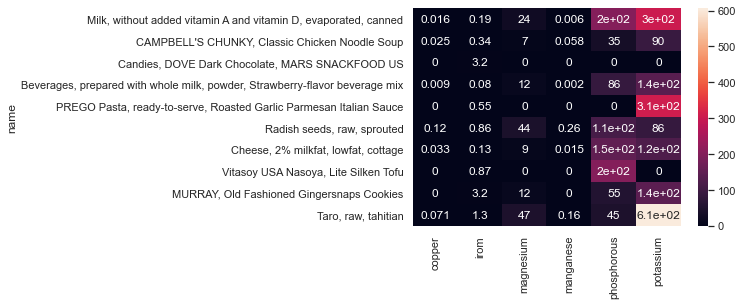

In [72]:

df_min = df_min.loc[list(np.random.choice(df.index, size=10))]
g = sns.heatmap(df_min, annot=True)